# Decline in Product Revenue as an Indicator of Churn

## Importing the libraries 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [12]:
df = pd.read_csv('files/cleaned_expansion.csv')


## Creating churn flag

In [13]:
# df['score_date'] = pd.to_datetime(df['score_date'], format='%d-%m-%Y')
df['arr_change'] = df['future_arr'] - df['current_arr']
df['perc_change'] = (df['future_arr'] - df['current_arr']) / df['current_arr']
df['churn_flag'] = (df['future_arr'] < df['current_arr'] * 0.8).astype(int)

## Bar Chart of Churn Products

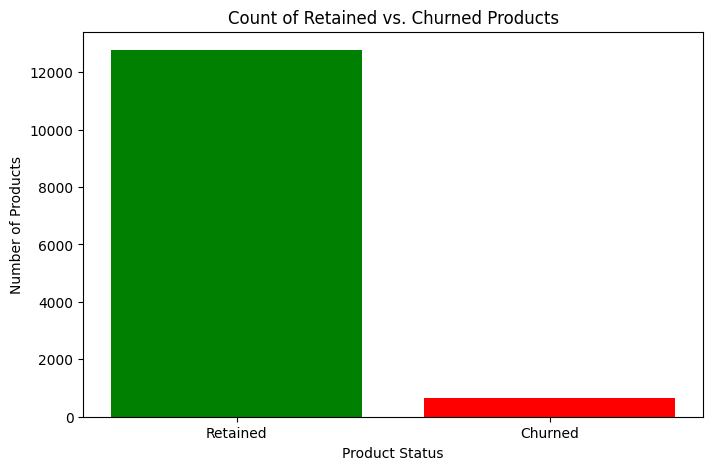

In [14]:
churn_counts = df['churn_flag'].value_counts().sort_index()  # 0 = retained, 1 = churned
plt.figure(figsize=(8, 5))
plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.xlabel('Product Status')
plt.ylabel('Number of Products')
plt.title('Count of Retained vs. Churned Products')
plt.show()

## Scatter Plot of Current vs Future ARR

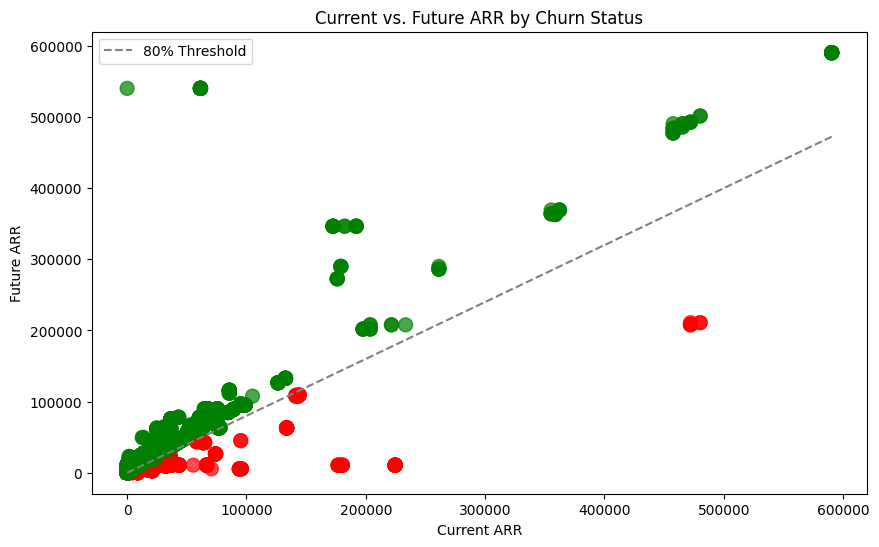

In [15]:
plt.figure(figsize=(10, 6))
colors = df['churn_flag'].map({0: 'green', 1: 'red'})
plt.scatter(df['current_arr'], df['future_arr'], c=colors, s=100, alpha=0.7)
plt.xlabel('Current ARR')
plt.ylabel('Future ARR')
plt.title('Current vs. Future ARR by Churn Status')
import numpy as np
x_vals = np.linspace(df['current_arr'].min(), df['current_arr'].max(), 100)
plt.plot(x_vals, 0.8 * x_vals, linestyle='--', color='gray', label='80% Threshold')
plt.legend()
plt.show()
